<h1 style="text-align: center;color:orange" markdown="1"> PRETRAITEMENT </h1> 

 ## _Contenu_
 - <span style="color:blue">Approche et Methodologie</span>
 - <span style="color:blue">Compréhension des données</span>  
 - <span style="color:blue">Prétraitement</span>
 - <span style="color:blue">Sélection de variables pertinentes </span>
 - <span style="color:blue">Détection outliers </span>

    


In [66]:
#Importation des librairies
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from numpy import random
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
import plotly.express as px



# Compréhension des données

In [67]:
df=pd.read_csv('../Data/DR31.txt')

C:\Users\konate\anaconda3_1\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (18,20,21,22,26,30) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3783529 entries, 0 to 3783528
Data columns (total 35 columns):
 #   Column          Dtype  
---  ------          -----  
 0   DR              int64  
 1   CEN             int64  
 2   POLICE          int64  
 3   O               int64  
 4   P               int64  
 5   ENR             object 
 6   MM              int64  
 7   AAAA            int64  
 8   DATE-FACT       object 
 9   DIAM            int64  
 10  CUBCONS         int64  
 11  CUBFAC          int64  
 12  FORFAIT         int64  
 13  SOCIAL          int64  
 14  DOMEST          int64  
 15  NORMAL          int64  
 16  INDUST          int64  
 17  ADMINI          int64  
 18  MONT-SOD        object 
 19  MONT-TVA        int64  
 20  MONT-FDE        object 
 21  MONT-FNE        object 
 22  MONT-ASS-TTC    object 
 23  MONT-FRAIS-CPT  int64  
 24  MONT-TTC        object 
 25  DATE-ABON       object 
 26  DATE-RESIL      object 
 27  TOURNEE         float64
 28  DATE-REGLT  

In [69]:
df.head()

,DR,CEN,POLICE,O,P,ENR,MM,AAAA,DATE-FACT,DIAM,...,DATE-ABON,DATE-RESIL,TOURNEE,DATE-REGLT,AAENC,MMENC,RESILIE,CATEGORIE,NOUVEAU,DATE-REGLT-ENC
0,31,138,578,2,3,EN,2,2014,2014-03-07 00:00:00.000,1,...,NaN,1981-09-21 00:00:00.000,190.0,2014-05-02 00:00:00.000,2014.0,mai,1.0,PRIVE,0,2
1,31,138,578,2,3,EN,5,2014,2014-06-04 00:00:00.000,1,...,NaN,1981-09-21 00:00:00.000,190.0,2014-08-01 00:00:00.000,2014.0,août,1.0,PRIVE,0,5
2,31,138,578,2,3,EN,8,2014,2014-09-05 00:00:00.000,1,...,NaN,1981-09-21 00:00:00.000,190.0,2014-11-03 00:00:00.000,2014.0,nov.,1.0,PRIVE,0,8
3,31,138,578,2,3,EN,11,2014,2014-12-02 00:00:00.000,1,...,NaN,1981-09-21 00:00:00.000,190.0,2015-01-27 00:00:00.000,2015.0,janv.,1.0,PRIVE,0,11
4,31,138,579,3,3,EN,2,2014,2014-03-07 00:00:00.000,1,...,NaN,1981-11-02 00:00:00.000,190.0,2014-05-08 00:00:00.000,2014.0,mai,1.0,PRIVE,0,2


**Variables qualitatives et quantitatives**


In [70]:
#Variables qualitatives et quantitatives
df_copy=df.copy(deep=True)
quantitative_variable=[]
qualitative_variable=[]
for i in df.columns:
    if df[i].dtypes=='object':
        qualitative_variable.append(i)
    else:
        quantitative_variable.append(i)
print('Nombres de variables quantitatives :',len(quantitative_variable))
print('Nombres de variables qualitatives  :',len(qualitative_variable))
df_quanti=df_copy.loc[:, quantitative_variable]
df_quali=df_copy.loc[:, qualitative_variable]



Nombres de variables quantitatives : 23
Nombres de variables qualitatives  : 12


 **recherche de doublons**

In [71]:
df.duplicated().sum()

0

Nous constatons qu'il n'y a pas de doublons (d'individu en double) dans le dataset.

**1.variables quantitatives**

In [72]:
df_quanti[quantitative_variable[:11]].describe()

,DR,CEN,POLICE,O,P,MM,AAAA,DIAM,CUBCONS,CUBFAC,FORFAIT
count,3783529.0,3.783529e+06,3.783529e+06,3.783529e+06,3.783529e+06,3.783529e+06,3.783529e+06,3.783529e+06,3.783529e+06,3.783529e+06,3.783529e+06
mean,31.0,1.382449e+02,3.856445e+04,1.733999e+00,2.907835e+00,6.570840e+00,2.016665e+03,1.021177e+00,4.661215e+01,4.741826e+01,8.659891e+00
std,0.0,4.857760e+00,2.483595e+04,1.188231e+00,4.193271e-01,3.451971e+00,1.712619e+00,2.846577e-01,2.335951e+02,2.783617e+02,2.254483e+00
min,31.0,1.300000e+02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.014000e+03,1.000000e+00,-8.800500e+04,-8.800500e+04,-9.000000e+00
25%,31.0,1.380000e+02,1.595000e+04,1.000000e+00,3.000000e+00,4.000000e+00,2.015000e+03,1.000000e+00,1.700000e+01,1.700000e+01,9.000000e+00
50%,31.0,1.380000e+02,3.793200e+04,1.000000e+00,3.000000e+00,7.000000e+00,2.017000e+03,1.000000e+00,3.200000e+01,3.200000e+01,9.000000e+00
75%,31.0,1.420000e+02,5.985400e+04,2.000000e+00,3.000000e+00,1.000000e+01,2.018000e+03,1.000000e+00,5.200000e+01,5.200000e+01,9.000000e+00
max,31.0,1.430000e+02,9.424900e+04,9.000000e+00,3.000000e+00,1.200000e+01,2.019000e+03,1.500000e+01,8.716900e+04,1.382400e+05,9.270000e+02


In [73]:
df_quanti[quantitative_variable[11:]].describe()

,SOCIAL,DOMEST,NORMAL,INDUST,ADMINI,MONT-TVA,MONT-FRAIS-CPT,TOURNEE,AAENC,RESILIE,NOUVEAU,DATE-REGLT-ENC
count,3.783529e+06,3.783529e+06,3.783529e+06,3.783529e+06,3.783529e+06,3.783529e+06,3.783529e+06,3.763851e+06,3.643790e+06,3.758535e+06,3.783529e+06,3.783529e+06
mean,7.042434e+00,2.011882e+01,4.287253e+00,5.066708e+00,2.242019e+00,1.300298e+03,3.576338e-01,2.390235e+02,2.016911e+03,7.297114e-01,2.087593e-01,3.855505e+01
std,3.388470e+00,2.203510e+01,2.091645e+01,2.005137e+02,1.857139e+02,1.141535e+04,3.886330e+01,1.390465e+02,1.757356e+00,4.441089e-01,4.064221e-01,2.085655e+01
min,-9.000000e+00,-8.100000e+01,-2.100000e+02,-6.764100e+04,-8.800500e+04,-3.608205e+06,-1.000000e+04,0.000000e+00,2.013000e+03,0.000000e+00,0.000000e+00,1.000000e+00
25%,6.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.190000e+02,2.015000e+03,0.000000e+00,0.000000e+00,2.100000e+01
50%,9.000000e+00,1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,5.740000e+02,0.000000e+00,2.600000e+02,2.017000e+03,1.000000e+00,0.000000e+00,4.000000e+01
75%,9.000000e+00,3.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.394000e+03,0.000000e+00,3.430000e+02,2.018000e+03,1.000000e+00,0.000000e+00,5.700000e+01
max,1.900000e+01,3.530000e+02,4.800000e+02,1.379400e+05,8.832400e+04,5.667102e+06,3.611000e+03,9.100000e+02,2.020000e+03,1.000000e+00,1.000000e+00,7.200000e+01


Nous pouvons constater qu'il y a des abonnés atypiques suivant ces variables

**2.variables qualitatives**

In [74]:
df_quali.describe(include='all')

,ENR,DATE-FACT,MONT-SOD,MONT-FDE,MONT-FNE,MONT-ASS-TTC,MONT-TTC,DATE-ABON,DATE-RESIL,DATE-REGLT,MMENC,CATEGORIE
count,3783529,3783529,3783529,3783529,3783529,3783529,3763902,326743,3024768,3643790,3643790,3783529
unique,4,1762,5497,13325,10097,15272,11344,1460,11419,2381,36,2
top,EN,2019-02-06 00:00:00.000,2052,63,0,27,1997-11-28 00:00:00.000,2019-04-23 00:00:00.000,2001-01-13 00:00:00.000,2016-05-04 00:00:00.000,mars,PRIVE
freq,3724096,33505,394565,378881,986648,229335,23424,3095,253482,15863,271693,3730777


*Suivant ces variables qualitatives , nous constatons qu'il y a des abonnées atypiques.*

# Prétraitement

In [75]:
date_var=['DATE-FACT','MONT-TTC','DATE-ABON','DATE-RESIL','DATE-REGLT']
var_suppr=['POLICE','DATE-ABON','DATE-RESIL','MONT-TTC','DATE-REGLT-ENC','DR','DATE-FACT','AAENC','MMENC']
convert=['MONT-SOD','MONT-FDE','MONT-FNE','MONT-ASS-TTC']

In [76]:
#Traiter la variable MMENC
df['MMENC']=df['MMENC'].replace(['mai', 'août', 'nov.', 'janv.', 'févr.', 'sept.', 'avr.', 'oct.','déc.', 'mars', 'juil.', 'juin']
,['5','8','11','1','2','9','4','10','12','3','7','6'])
df.MMENC = df.MMENC.astype(float)

*Les codes pci-desus nous permetent de recoder la variables MMENC pour ensuite l'utiliser en tant que variable nuperique dans la suite du travail*

**convertir des variables en quantitatives**

*Les variables MONT-SOD, MONT-FDE, MONT-ASS-TTC, MONT-FNE ne peuvent pas être convertir avec la fpnction to-numeric de la bibliothèque pandas car elles contiennent de trop grandes valeurs. Pour les transformer, nous allons écrire une fonction et l'utiliser.*

In [77]:
def coro(param):
    if len(param.split("E+"))==2:
        split1,split2=param.split("E+")
        split1=split1.replace(",",".")
        val=float(split1)*np.product([10 for i in range(int(split2))])
        return val
    return float(param)




In [78]:
df.loc[:,'MONT-SOD']=df.loc[:,'MONT-SOD'].apply(str)
df.loc[:,'MONT-FDE']=df.loc[:,'MONT-FDE'].apply(str)
df.loc[:,'MONT-ASS-TTC']=df.loc[:,'MONT-ASS-TTC'].apply(str)
df.loc[:,'MONT-FNE']=df.loc[:,'MONT-FNE'].apply(str)



In [79]:
df.loc[:,'MONT-SOD']=df.loc[:,'MONT-SOD'].apply(coro)
df.loc[:,'MONT-FDE']=df.loc[:,'MONT-FDE'].apply(coro)
df.loc[:,'MONT-ASS-TTC']=df.loc[:,'MONT-ASS-TTC'].apply(coro)
df.loc[:,'MONT-FNE']=df.loc[:,'MONT-FNE'].apply(coro)

**Gestions des dates**

In [80]:
for i in date_var:
    df[i]=pd.to_datetime(df[i],errors = 'coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3783529 entries, 0 to 3783528
Data columns (total 35 columns):
 #   Column          Dtype         
---  ------          -----         
 0   DR              int64         
 1   CEN             int64         
 2   POLICE          int64         
 3   O               int64         
 4   P               int64         
 5   ENR             object        
 6   MM              int64         
 7   AAAA            int64         
 8   DATE-FACT       datetime64[ns]
 9   DIAM            int64         
 10  CUBCONS         int64         
 11  CUBFAC          int64         
 12  FORFAIT         int64         
 13  SOCIAL          int64         
 14  DOMEST          int64         
 15  NORMAL          int64         
 16  INDUST          int64         
 17  ADMINI          int64         
 18  MONT-SOD        float64       
 19  MONT-TVA        int64         
 20  MONT-FDE        float64       
 21  MONT-FNE        float64       
 22  MONT-ASS-TTC    fl

**Vérifications et traitements des NaN**

In [81]:
df_new=df.copy()
na_var=[]
na_percent=0
for i in df_new.columns:
    u=df_new[i].isnull().sum()/df_new.shape[0]
    if u>0.0:
        na_var.append(i)
        na_percent+=u
        print(i,":",u ,'%')
print('Il y a ',len(na_var), 'variables ayant des valeurs manquantes dans la base,environ :',na_percent,'%')

MONT-TTC : 0.0051874850172947 %
DATE-ABON : 0.9136406777904966 %
DATE-RESIL : 0.20055244719942678 %
TOURNEE : 0.005200964496373623 %
DATE-REGLT : 0.03693350837273878 %
AAENC : 0.03693350837273878 %
MMENC : 0.03693350837273878 %
RESILIE : 0.006606001962717875 %
Il y a  8 variables ayant des valeurs manquantes dans la base,environ : 1.2419881015845256 %


**- Traitement de la variable TOURNEE**

In [82]:
df_new[df_new['TOURNEE'].isnull()].shape

(19678, 35)

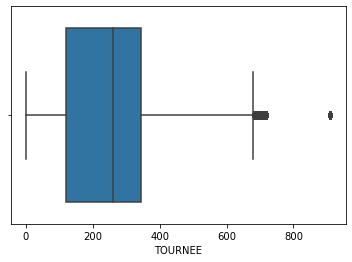

In [83]:
ax = sns.boxplot(x=df_new["TOURNEE"])
ax


In [84]:
df_new['TOURNEE'].describe()

count    3.763851e+06
mean     2.390235e+02
std      1.390465e+02
min      0.000000e+00
25%      1.190000e+02
50%      2.600000e+02
75%      3.430000e+02
max      9.100000e+02
Name: TOURNEE, dtype: float64

In [85]:
df_new['TOURNEE'].fillna(df_new['TOURNEE'].median(),inplace=True)

*Vu le boxplot, il serait intéressant de choisir comme valeur de remplacement des nan la médian car elle semble mieux représenter la variable.*

In [86]:
df_new['TOURNEE'].isna().sum()

0

*Nous voyons qu'il n'y a plus de valeurs manquantes pour la variables TOURNEE*

**-Traitement de la variable DATE-REGLT**

In [87]:
df_new.loc[:,"DATE-REGLT"].isnull().sum()

139739

In [88]:
df_new[df_new['DATE-REGLT'].isnull()]['MONT-FRAIS-CPT'].describe()

count    139739.000000
mean          0.546533
std          57.791463
min        -791.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        3611.000000
Name: MONT-FRAIS-CPT, dtype: float64

*On remarque que 50% des individus dont on ne connait pas la date de règlement de la facteur n'ont pas installer de compteur par eux-même.*

In [89]:
df_new[df_new['DATE-REGLT'].isnull()]['RESILIE'].describe()


count    130187.000000
mean          0.213631
std           0.409871
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: RESILIE, dtype: float64

*Nous constatons que 75% des individus dont on ignore la date de règlement de facture ont résilié leur abonement. Nous pouvons sans perte de généralité remplacer les valeurs manquantes par la date de factutre.*

In [90]:
ind=df_new[df_new['DATE-REGLT'].isnull()].index.to_list()   

In [91]:
#on suppose que les individus n'ayant pas de Date de reglement de facture ont pour valeur date facture
fact=df_new.loc[df_new['DATE-REGLT'].isna(), 'DATE-FACT']


In [92]:
df_new.loc[df_new['DATE-REGLT'].isna(), 'DATE-REGLT'] = fact.to_numpy()


In [93]:
df_new['DATE-REGLT'].isna().sum()

0

**- Traitement de la variable AAENC**

In [94]:
df_new.loc[df_new['AAENC'].isna(), 'AAENC'].shape

(139739,)

In [95]:
df_new['AAENC'].head()

0    2014.0
1    2014.0
2    2014.0
3    2015.0
4    2014.0
Name: AAENC, dtype: float64

In [96]:
df_new[df_new['AAENC'].isnull()]['RESILIE'].describe()


count    130187.000000
mean          0.213631
std           0.409871
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: RESILIE, dtype: float64

In [97]:
#on suppose que les individus n'ayant pas d'année d'encaissement  ont pour valeur année de facturation
fact_a=df_new.loc[df_new['AAENC'].isna(), 'AAAA']
df_new.loc[df_new['AAENC'].isna(), 'AAENC'] = fact_a.to_numpy()


**- Traitement de la variable MMENC**

In [98]:
#on suppose que les individus n'ayant pas de mois d'encaissement  ont pour valeur mois de facturation

fact_m=df_new.loc[df_new['MMENC'].isna(), 'MM']
df_new.loc[df_new['MMENC'].isna(), 'MMENC'] = fact_m.to_numpy()


In [99]:
df_new['MMENC'].isna().sum()

0

In [100]:
#correction de quelques variables dans la base
df_new['AAENC'] = df_new['AAENC'].astype (str)
df_new['MMENC'] = df_new['MMENC'].astype (str)
df_new['AAAA']=df_new['AAAA'].astype(str)
df_new['MM']=df_new['MM'].astype(str)
df_new['AAENC']=df_new['AAENC'].replace(['2014.0', '2015.0', '2016.0', '2013.0', '2017.0', '2019.0',
       '2018.0', '2020.0'],['2014', '2015', '2016', '2013', '2017', '2019',
       '2018', '2020'])
df_new['MMENC']=df_new['MMENC'].replace(['5.0', '8.0', '11.0', '1.0', '2.0', '9.0', '4.0', '10.0', '12.0',
       '3.0', '7.0', '6.0'],['5', '8', '11', '1', '2', '9', '4', '10', '12',
       '3', '7', '6'])

**-Traitement de la varibale RESILIE**

In [101]:
df_new[df_new['RESILIE'].isnull()].shape

(24994, 35)

In [102]:
df_new['RESILIE'].describe()

count    3.758535e+06
mean     7.297114e-01
std      4.441089e-01
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      1.000000e+00
Name: RESILIE, dtype: float64

*cette variable est à suivre de près,il y a environ 25% des abonnées qui ont résilié leur abonnement.*

In [103]:
#pourcentage  de resilie=0
df_new[df_new['RESILIE']==0].shape[0]/df_new['RESILIE'].shape[0]

0.2685030298433024

In [104]:
#pourcentage  de resilie=1
df_new[df_new['RESILIE']==1].shape[0]/df_new['RESILIE'].shape[0]

0.7248909681939798

*On parle de résialiation lorsqu'il y a rupture du contrat entre le client et la SODECI,celà peut être dû par un taux élévé de consommation impayé ou une rupture du contrat par le client.*

Une TVA négative signifie que l'individu à des impayés.On suppose alors que tous les individus ayant un montant de TVA
nul ou négative sont des abonnées qui ont résilié leurs contrats et ceux ayant une TVA positive sont toujours client.

In [105]:
df_new.loc[df_new['RESILIE'].isna(),].loc[df_new['MONT-TVA']<=0,'RESILIE'].shape

(10062,)

In [106]:
#Remplacer chaque Nan qui sont tels que le montant de la tva est négatif.
ind=df_new.loc[df_new['RESILIE'].isna(),].loc[df_new['MONT-TVA']<=0,'RESILIE'].index
df_new.loc[ind,'RESILIE']=0.0

In [107]:
#On suppose que le reste des individus(les individus ayant un MONTANT-TVA positive sont toujours abonné) ont pour valeur resilie=1
df_new.loc[df_new['RESILIE'].isna(),'RESILIE']=1

In [108]:
df_new['RESILIE'].isna().sum()

0

In [109]:
df_new.isna().sum()

DR                      0
CEN                     0
POLICE                  0
O                       0
P                       0
ENR                     0
MM                      0
AAAA                    0
DATE-FACT               0
DIAM                    0
CUBCONS                 0
CUBFAC                  0
FORFAIT                 0
SOCIAL                  0
DOMEST                  0
NORMAL                  0
INDUST                  0
ADMINI                  0
MONT-SOD                0
MONT-TVA                0
MONT-FDE                0
MONT-FNE                0
MONT-ASS-TTC            0
MONT-FRAIS-CPT          0
MONT-TTC            19627
DATE-ABON         3456786
DATE-RESIL         758796
TOURNEE                 0
DATE-REGLT              0
AAENC                   0
MMENC                   0
RESILIE                 0
CATEGORIE               0
NOUVEAU                 0
DATE-REGLT-ENC          0
dtype: int64

# **Suppression de variables non pertinentes**


Dans cette partie il s'agira de supprimer les variables dont ne sont pas pertinentes pour la typologie des abonnées

In [110]:
#supprimer quelques variables
df_new.drop(columns=var_suppr,axis=1,inplace=True)

In [56]:
df_new.isna().sum()

CEN               0
O                 0
P                 0
ENR               0
MM                0
AAAA              0
DIAM              0
CUBCONS           0
CUBFAC            0
FORFAIT           0
SOCIAL            0
DOMEST            0
NORMAL            0
INDUST            0
ADMINI            0
MONT-SOD          0
MONT-TVA          0
MONT-FDE          0
MONT-FNE          0
MONT-ASS-TTC      0
MONT-FRAIS-CPT    0
TOURNEE           0
DATE-REGLT        0
RESILIE           0
CATEGORIE         0
NOUVEAU           0
dtype: int64

In [57]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3783529 entries, 0 to 3783528
Data columns (total 26 columns):
 #   Column          Dtype         
---  ------          -----         
 0   CEN             int64         
 1   O               int64         
 2   P               int64         
 3   ENR             object        
 4   MM              int64         
 5   AAAA            int64         
 6   DIAM            int64         
 7   CUBCONS         int64         
 8   CUBFAC          int64         
 9   FORFAIT         int64         
 10  SOCIAL          int64         
 11  DOMEST          int64         
 12  NORMAL          int64         
 13  INDUST          int64         
 14  ADMINI          int64         
 15  MONT-SOD        float64       
 16  MONT-TVA        int64         
 17  MONT-FDE        float64       
 18  MONT-FNE        float64       
 19  MONT-ASS-TTC    float64       
 20  MONT-FRAIS-CPT  int64         
 21  TOURNEE         float64       
 22  DATE-REGLT      da

In [58]:
#selection des variables non numérique
quali=df_new.select_dtypes(include=['object']).columns.to_list()+df_new.select_dtypes(include=['datetime64[ns]']).columns.to_list()
quanti_data=df_new.drop(columns=quali,axis=1)


Text(0.5, 1.0, 'Corrélation Heatmap')

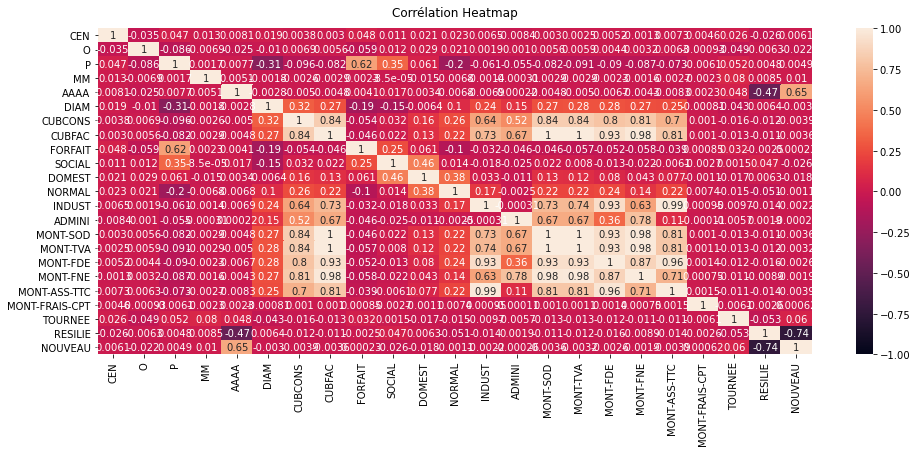

In [59]:
#correlations des variables
plt.figure (figsize = (16, 6))
heatmap = sns.heatmap (quanti_data.corr (), vmin = -1, vmax = 1, annot = True)
heatmap.set_title ('Corrélation Heatmap', fontdict = {'fontsize': 12}, pad = 12)

On a plusiseurs variables qui sont liés.On se trouve dans un cas de multicolinéarité.

In [60]:
#recodage de variables qualitatives
quali_data=df_new.loc[:,quali]
quali_data=pd.get_dummies(quali_data, drop_first=True)
quanti_data=pd.concat([quanti_data, quali_data], axis=1)

Text(0.5, 1.0, 'Corrélation Heatmap')

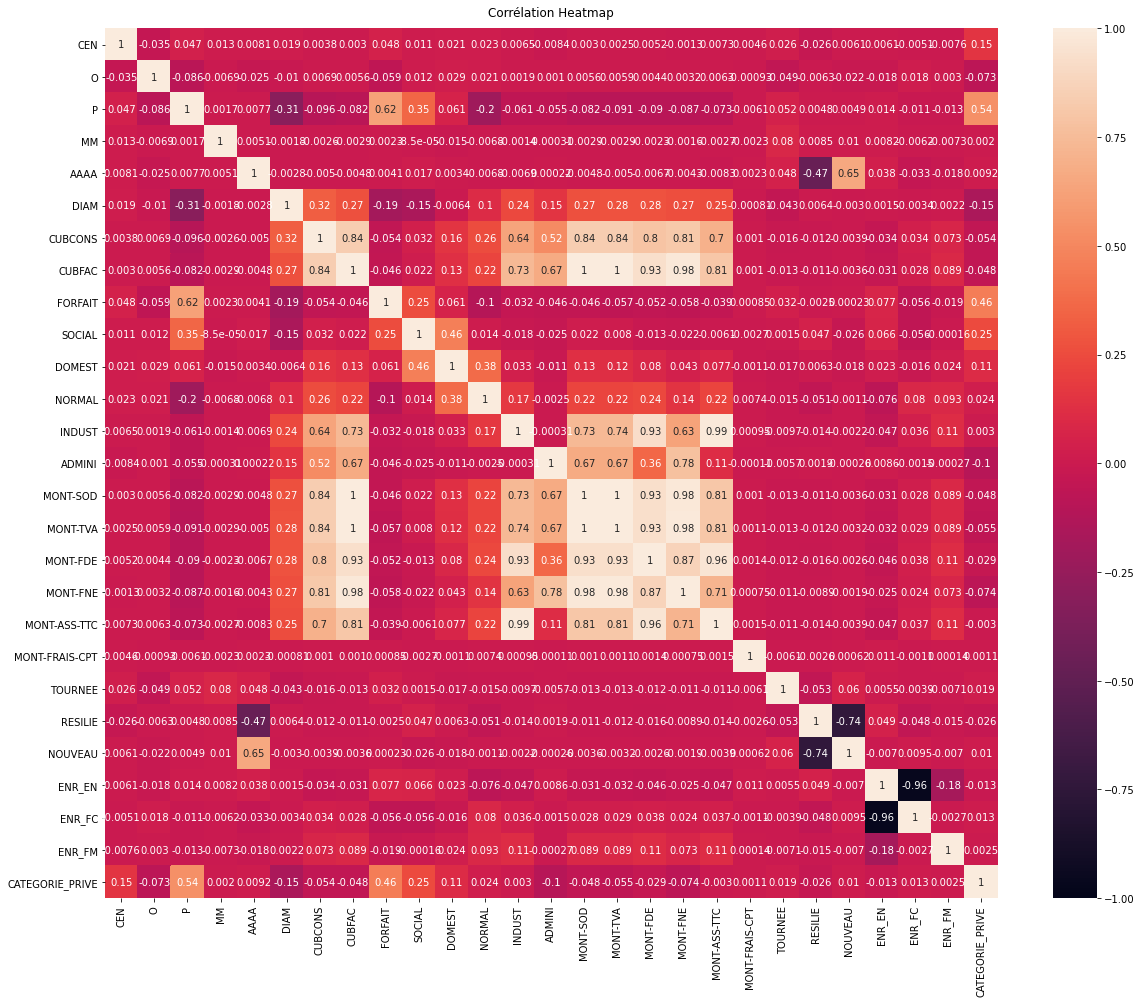

In [61]:

#correlations des variables
plt.figure (figsize = (20, 16))
heatmap = sns.heatmap (quanti_data.corr (), vmin = -1, vmax = 1, annot = True)
heatmap.set_title ('Corrélation Heatmap', fontdict = {'fontsize': 12}, pad = 12)

# Recherche d'outliers

In [62]:
quanti_data.drop(columns=['DATE-REGLT'],axis=1,inplace=True)
X=quanti_data.values
clf = IsolationForest(random_state=0,contamination=0.01).fit(X)


In [63]:
outliers=clf.predict(X)==-1
sum(outliers)


37836

*On constate ici un nombre non négligeable  d'outliers (individu anormales dans la base) détecté par 
l'algorithme IsolationForest qui s'élève à 37840*

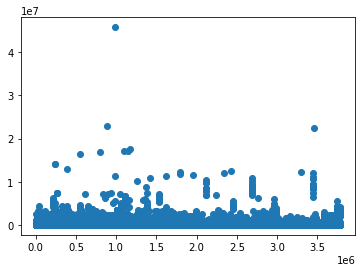

In [64]:
#visualisation des outliers détecté 
ind_outliers=df_new.loc[outliers,]
plt.scatter(x=ind_outliers.index,y=ind_outliers.loc[:,'MONT-FDE'])

# Enregistrement de la base après traitement

In [65]:
quanti_data.to_csv('../Data/ML_DATA2.csv',header=True)

Ce code ci-dessus permet sauvegarder une version du fichier traité